In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
df = pd.read_csv('data_for_predictions.csv')

df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split


In [12]:
x = df.drop(['id','churn'],axis=1)
y = df['churn']

print(x.shape)
print(y.shape)

(14606, 61)
(14606,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10954, 61)
(3652, 61)
(10954,)
(3652,)


# model training
Once again, we are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With ensemble methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
It is able to handle non-linear parameters better than linear based models
On the flip side, some disadvantages of the random forest classifier include:

The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
Training time can be longer due to the increased complexity and size of thee ensemble

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators = 1000)

model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [20]:
model.score(x_test,y_test)

0.9041621029572837

# evaluation 
Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

Accuracy = the ratio of correctly predicted observations to the total observations
Precision = the ability of the classifier to not label a negative sample as positive
Recall = the ability of the classifier to find all the positive samples
The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario

In [22]:
from sklearn import metrics 

In [24]:
predictions = model.predict(x_test)
metrics.confusion_matrix(y_test,predictions)

array([[3283,    3],
       [ 349,   17]], dtype=int64)

In [26]:
tn, fp, fn, tp=metrics.confusion_matrix(y_test,predictions).ravel()

In [27]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")


True positives: 17
False positives: 3
True negatives: 3283
False negatives: 349



In [28]:
metrics.accuracy_score(y_test,predictions)

0.9036144578313253

In [29]:
metrics.precision_score(y_test,predictions)

0.85

In [30]:
metrics.recall_score(y_test,predictions)

0.04644808743169399

In [31]:
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

Accuracy: 0.9036144578313253
Precision: 0.85
Recall: 0.04644808743169399


# feature importance

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [32]:
model.feature_importances_

array([0.05333191, 0.01143776, 0.03822661, 0.04804746, 0.00128411,
       0.05092289, 0.02232806, 0.01187567, 0.00485787, 0.00438205,
       0.03291674, 0.04811198, 0.04767407, 0.00867816, 0.0514587 ,
       0.03650781, 0.02747305, 0.01395819, 0.00856813, 0.01160393,
       0.00450016, 0.00425659, 0.02761533, 0.01399988, 0.00967434,
       0.0163821 , 0.00739485, 0.00443527, 0.00688664, 0.00208585,
       0.00204899, 0.01626168, 0.00723245, 0.00438542, 0.02651325,
       0.00720391, 0.02960698, 0.0141335 , 0.02787119, 0.01417791,
       0.00568802, 0.01447794, 0.01646302, 0.00897491, 0.01688563,
       0.00445781, 0.00118659, 0.00442159, 0.01560584, 0.03222772,
       0.01628734, 0.02927054, 0.01585543, 0.00441575, 0.00272196,
       0.00687826, 0.00311656, 0.00457733, 0.0049709 , 0.00397324,
       0.00723217])

In [39]:
feature_imp = pd.DataFrame({
    'feature':x_train.columns,
    'importance':model.feature_importances_
}).sort_values(by='importance',ascending=True).reset_index()

In [40]:
feature_imp

,index,feature,importance
0,46,peak_mid_peak_fix_max_monthly_diff,0.001187
1,4,forecast_discount_energy,0.001284
2,30,var_6m_price_mid_peak_fix,0.002049
3,29,var_6m_price_peak_fix,0.002086
4,54,channel_ewpakwlliwisiwduibdlfmalxowmwpci,0.002722
...,...,...,...
56,3,forecast_cons_12m,0.048047
57,11,margin_gross_pow_ele,0.048112
58,5,forecast_meter_rent_12m,0.050923
59,14,net_margin,0.051459


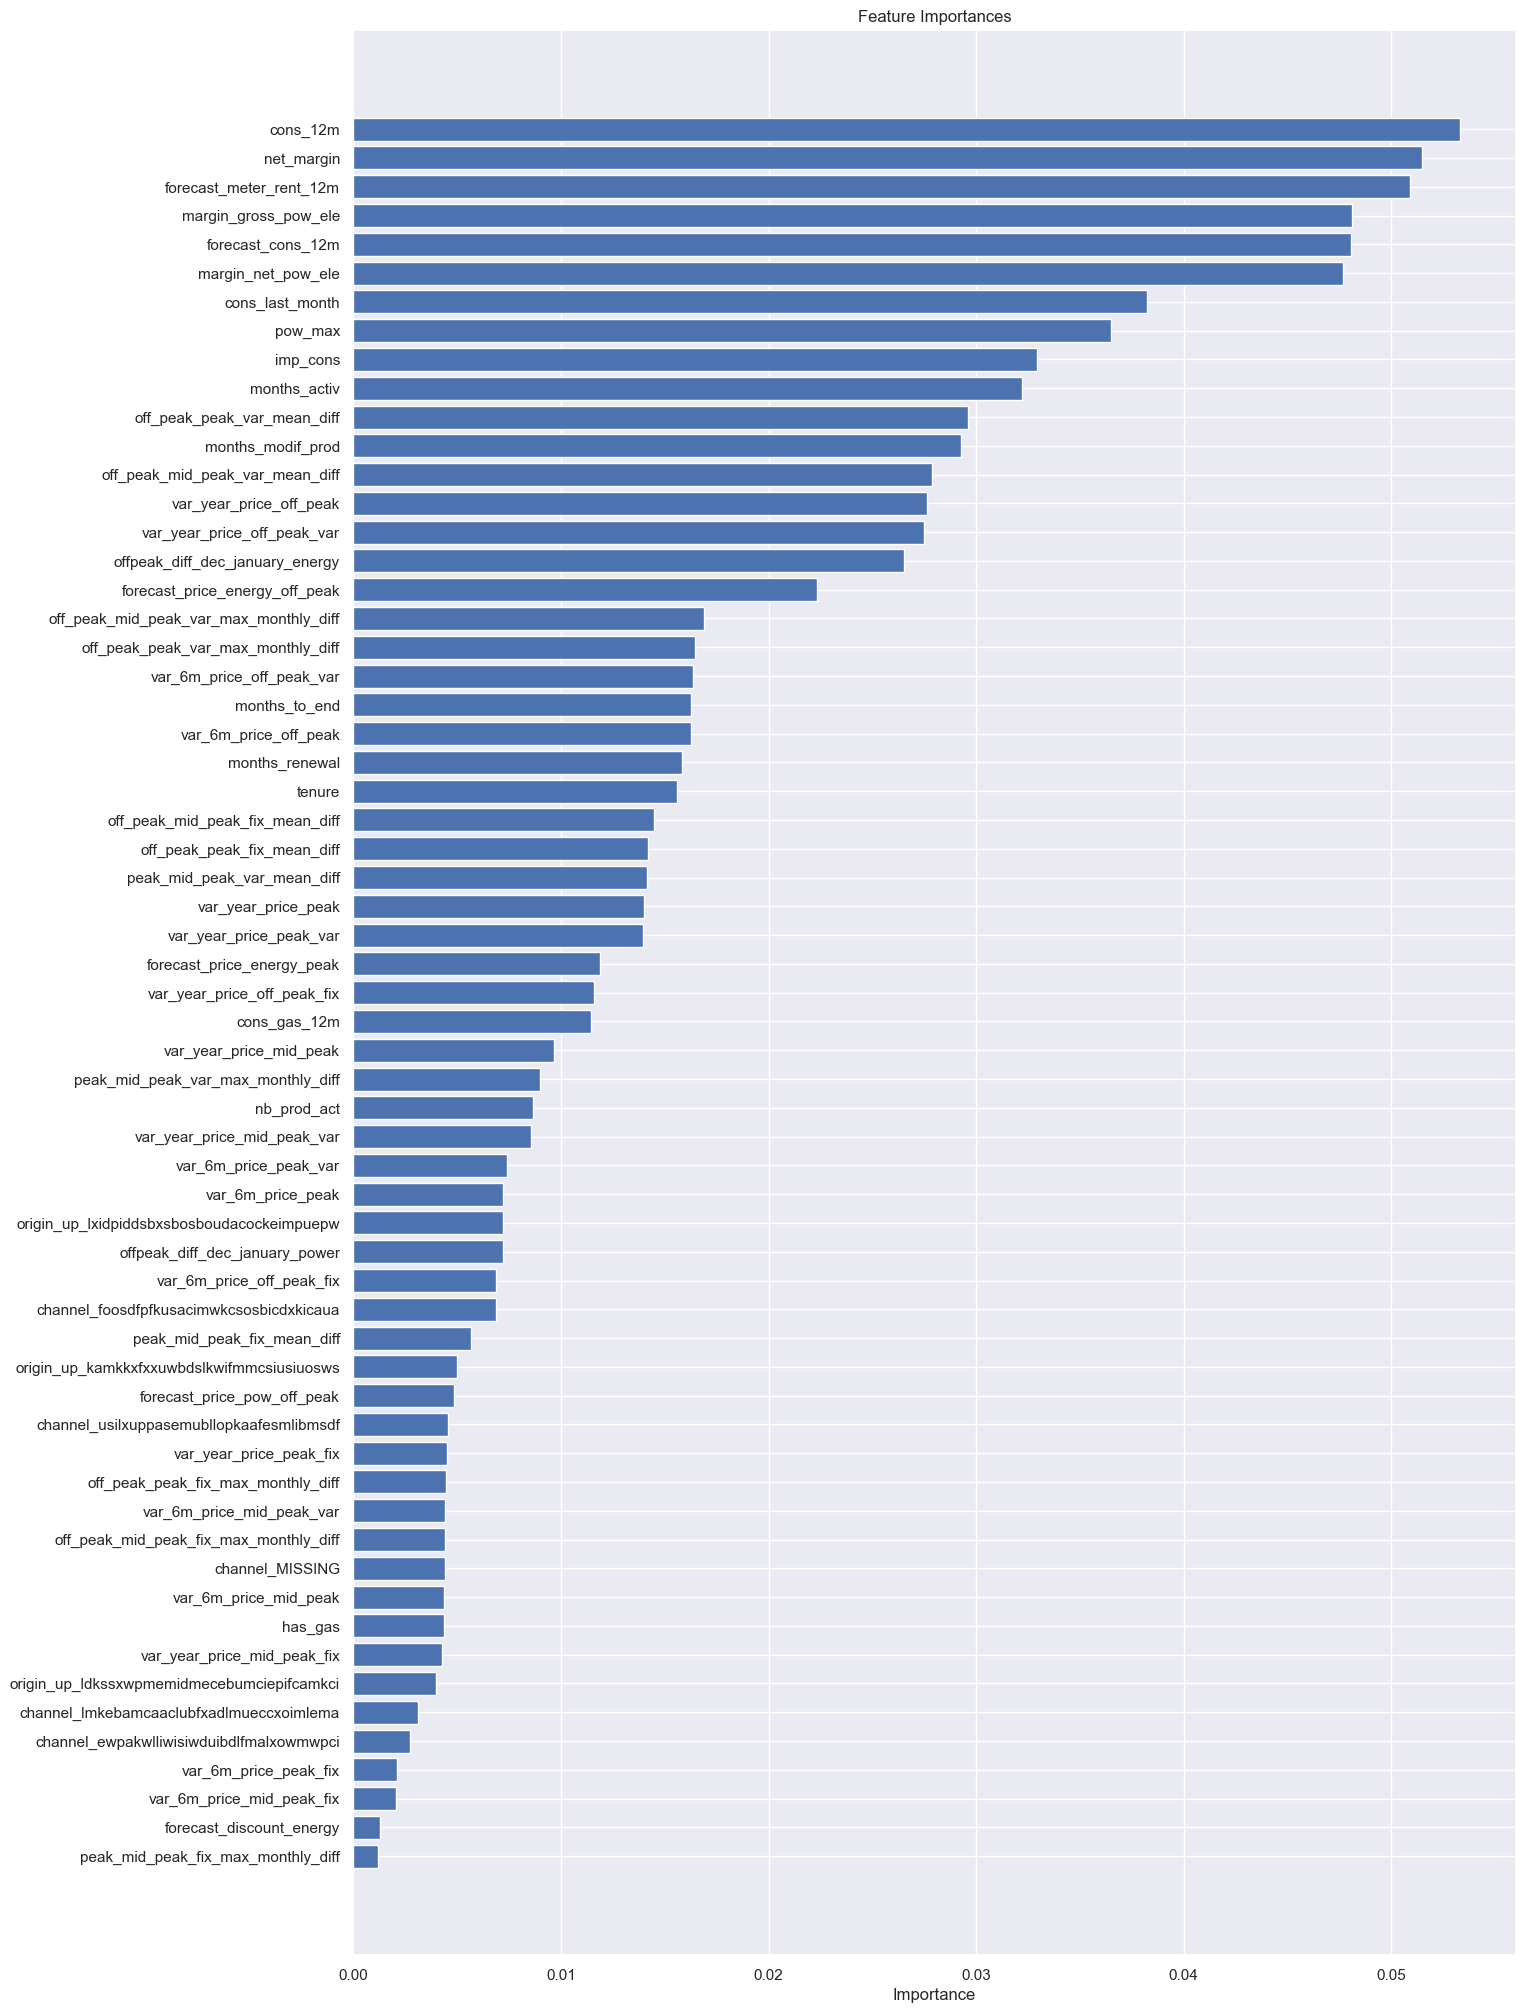

In [43]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_imp)), feature_imp['importance'], color='b', align='center')
plt.yticks(range(len(feature_imp)), feature_imp['feature'])
plt.xlabel('Importance')
plt.show()

In [44]:
proba_predictions = model.predict_proba(x_test)
probabilities = proba_predictions[:, 1]

In [47]:
x_test = x_test.reset_index()
x_test.drop(['index'],inplace=True,axis=1)

In [49]:
x_test=x_test.drop(columns='level_0')

In [50]:
x_test

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,2,1,0,0,1,0,0,0,0,1
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,3,3,0,0,1,0,0,0,0,1
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,5,3,0,0,1,0,0,0,0,1
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,10,0,0,1,0,0,0,0,1
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,45,9,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,6.298161,5.541745,5.270979,3.310600,0.0,1.300378,0.165022,0.086380,44.311378,1,...,71,0,1,0,0,0,0,1,0,0
3648,3.608633,4.009323,2.838219,2.782859,0.0,1.291591,0.144038,0.000000,45.811378,1,...,2,0,1,0,0,0,0,0,0,1
3649,4.956725,0.000000,3.798374,3.935728,0.0,2.544006,0.101700,0.092659,58.995952,0,...,59,9,0,0,1,0,0,0,0,1
3650,3.931966,3.509874,2.352183,2.914845,0.0,1.288249,0.140621,0.000000,44.311378,1,...,42,6,0,0,0,1,0,0,0,1


In [51]:
x_test['churn'] = predictions.tolist()
x_test['churn_probability'] = probabilities.tolist()

x_test.to_csv('out_of_sample_data_with_predictions.csv')